In the following example, a neural network will be used to model the dynamic response of a process described by the following ODE:

d^2 y(t)/dt^2  + dy(t)/dt + y(t) = x(t)

The transfer function of this process is:
G(s) = 1/s^2 + s + 1  

We have the dynamic response to a step input represented by a figure. The goal of the problem is to obtain a neural network that can predict the dynamic response of this process. The first step in this case is to define the inputs and outputs of the network. In this case, the ODE of equation 1 can be represented by a difference equation, where:


dy/dt is approximately = (y(k)-y(k-1))/t 
and 
d^2y/dt^2 is approximately = (y(k) - 2y(k-1) + y(k-2))/t^2


y(k) = ((2+T)*y(k-1) - y(k-2) + t^2*x(k))/(1+T+T^2)


where k represents the discretization time and T is the time interval used in the discretization to approximate the derivative by a difference equation. Thus, the inputs of the network are illustrated in figure 2.

The general procedure for adjusting the network parameters can be described as follows:

- selection of a set of input variables;
- choice of architecture (number of neurons in the hidden layer, activation function, etc.);
- network training;
- if performance is not satisfactory, then new parameters or input data should be chosen, else "end".

The next step is to obtain the training dataset. In this problem, to obtain a dynamic model of the process, the input variable x(k) must be perturbed with various step inputs of different amplitudes and durations. This richness facilitates the learning of the network.

The chosen network has 3 layers and was trained in Python. Here we have the result of the trained and tested network.



In [ ]:
import numpy as np
from sklearn.neural_network import MLPRegressor
from numpy import array
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
# Discretized model
def modelo_discretizado(u, T):
  
  i,j = u.shape
  h = np.zeros((1,j))

  for k in range(2,j):
    h[0,k] = ((2+T)*h[0,k-1] - h[0,k-2] + T*T*u[0,k-2])/(1 + T + T*T)

  return h

In [ ]:
# Generate input matrix.
def gera_matriz_entrada(h,u):

  i,j = h.shape

  X = np.zeros((j,3))
  Y = np.zeros((j))
  for k in range(2,j):
    X[k-2,:] = np.array((h[0,k-1],h[0,k-2],u[0,k-2]))
    Y[k-2] = np.array(h[0,k])

  return X, Y

## Training

In [ ]:
ndados = 100
T = 1

# Treinamento
# Entrada
u = np.concatenate([3*np.ones((1,ndados)), np.ones((1,ndados)), 2*np.ones((1,ndados)), 
           0.5*np.ones((1,ndados)), 0.25*np.ones((1,ndados)), 1.25*np.ones((1,ndados)), 
           0.75*np.ones((1,ndados))],axis=1)

h = modelo_discretizado(u, T)

In [405]:
# Entry data in neuron

X, Y = gera_matriz_entrada(h,u)

Xtrain, Xval, Ytrain, Yval = train_test_split(X, Y, random_state=1, test_size=0.1)

# Feedforward Neural Network
regr = MLPRegressor(max_iter=500,activation='tanh',hidden_layer_sizes=(10,),
                    solver='sgd',learning_rate_init=0.01,).fit(Xtrain, Ytrain)
regr.score(Xval,Yval)

0.9980444517030812

## Test

In [417]:

ut = np.array(0.35*np.ones((1,ndados)))

h = modelo_discretizado(ut,T)

Xtest, Ytest = gera_matriz_entrada(h,ut)

Yhat = regr.predict(Xtest)
regr.score(Xtest,Ytest)

0.9332543877618112

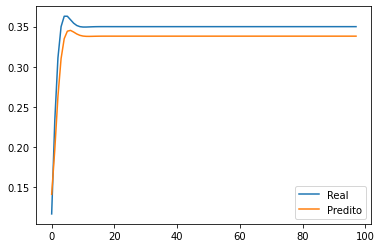

In [418]:
# Plot graphics
plt.plot(Ytest[:-2],label='Real')
plt.legend()
plt.plot(Yhat[:-2],label='Predito')
plt.legend()
plt.show()
